# Monkey Pox Disease

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
## Import the data
df = pd.read_csv("monkey_pox.csv")

In [150]:
## First five rows
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [151]:
## Last five rows
df.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


<br>

# Common Analysis

In [152]:
## Shape of the data
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 25000
Total Columns: 11


In [153]:
## Columns names
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [154]:
## Data Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [155]:
## Check for Null values
df.isna().sum()

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

In [156]:
## check for duplicate
df.duplicated().sum()

0

In [157]:
## Drop the id column
df.drop("Patient_ID", axis = 1, inplace = True)

In [158]:
## Convert Monkeypox to binary (0, 1) 
df = pd.get_dummies(df, columns=["MonkeyPox"], drop_first= True)

In [159]:
## Rename the monkeypox column
df = df.rename(columns={'MonkeyPox_Positive': 'MonkeyPox'})

In [160]:
## Data Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                25000 non-null  object
 1   Rectal Pain                     25000 non-null  bool  
 2   Sore Throat                     25000 non-null  bool  
 3   Penile Oedema                   25000 non-null  bool  
 4   Oral Lesions                    25000 non-null  bool  
 5   Solitary Lesion                 25000 non-null  bool  
 6   Swollen Tonsils                 25000 non-null  bool  
 7   HIV Infection                   25000 non-null  bool  
 8   Sexually Transmitted Infection  25000 non-null  bool  
 9   MonkeyPox                       25000 non-null  uint8 
dtypes: bool(8), object(1), uint8(1)
memory usage: 415.2+ KB


In [161]:
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,False,True,True,True,False,True,False,False,0
1,Fever,True,False,True,True,False,False,True,False,1
2,Fever,False,True,True,False,False,False,True,False,1
3,None,True,False,False,False,True,True,True,False,1
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,1


<br>

# Color Palette

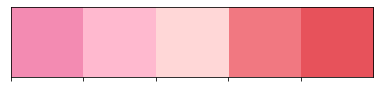

In [162]:
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']

sns.palplot(color_mix, size = 1.3)

<br>

# Categorical variables analysis

In [163]:
## Know the count of each value
for var in df.columns:
    print( df[var].value_counts())
    print("-------------------------------")

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64
-------------------------------
False    12655
True     12345
Name: Rectal Pain, dtype: int64
-------------------------------
True     12554
False    12446
Name: Sore Throat, dtype: int64
-------------------------------
True     12612
False    12388
Name: Penile Oedema, dtype: int64
-------------------------------
False    12514
True     12486
Name: Oral Lesions, dtype: int64
-------------------------------
True     12527
False    12473
Name: Solitary Lesion, dtype: int64
-------------------------------
True     12533
False    12467
Name: Swollen Tonsils, dtype: int64
-------------------------------
True     12584
False    12416
Name: HIV Infection, dtype: int64
-------------------------------
False    12554
True     12446
Name: Sexually Transmitted Infection, dtype: int64
-------------------------------
1    15909
0     9091
Name:

### Draw Box Plot & Bar Chart function

In [164]:
def draw_boxplot_and_barchart(labels, var, suptitle, xlable, xticks_indices):
    # Setting Colors, Labels, Order
    colors=color_mix[2:4]
    labels= labels
    order=df[var].value_counts().index

    ## Setting size & title of the figure
    plt.figure(figsize=(16, 8))
    plt.suptitle(suptitle,fontweight='heavy', 
                 fontsize='20', fontfamily='sans-serif')
    
    ## Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(df[var].value_counts(), labels=labels, colors=colors,
            autopct='%.2f%%')
    centre=plt.Circle((0, 0), 0.45, fc='white')
    plt.gcf().gca().add_artist(centre)

    ## Countplot
    plt.subplot(1, 2, 2)
    sns.countplot(x= var, data=df, palette=colors, order=order)
    plt.xlabel( xlable, fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.xticks(xticks_indices, labels)
    plt.grid(axis='y', alpha=0.4)

    plt.tight_layout()
    plt.show()

 ### Systemic Illness Distribution

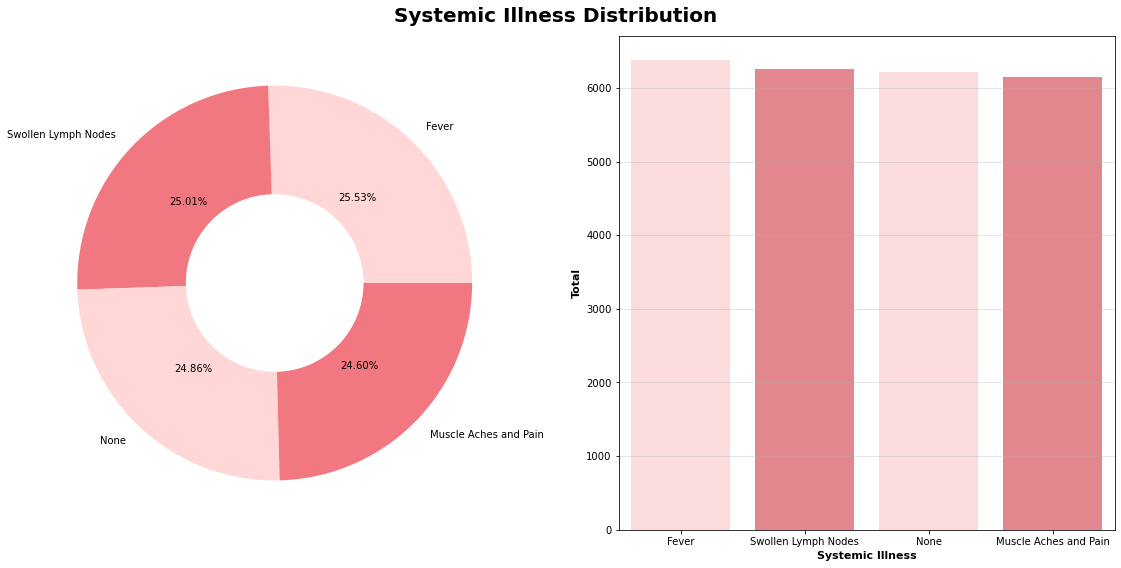

In [165]:
draw_boxplot_and_barchart(["Fever", "Swollen Lymph Nodes", "None", "Muscle Aches and Pain"], 
                          "Systemic Illness", "Systemic Illness Distribution", 
                          "Systemic Illness", [0, 1, 2, 3])

> <Mark>The distribution between different groups of systemic illness is almost the same.</Mark>

 ### Rectal Pain Distribution

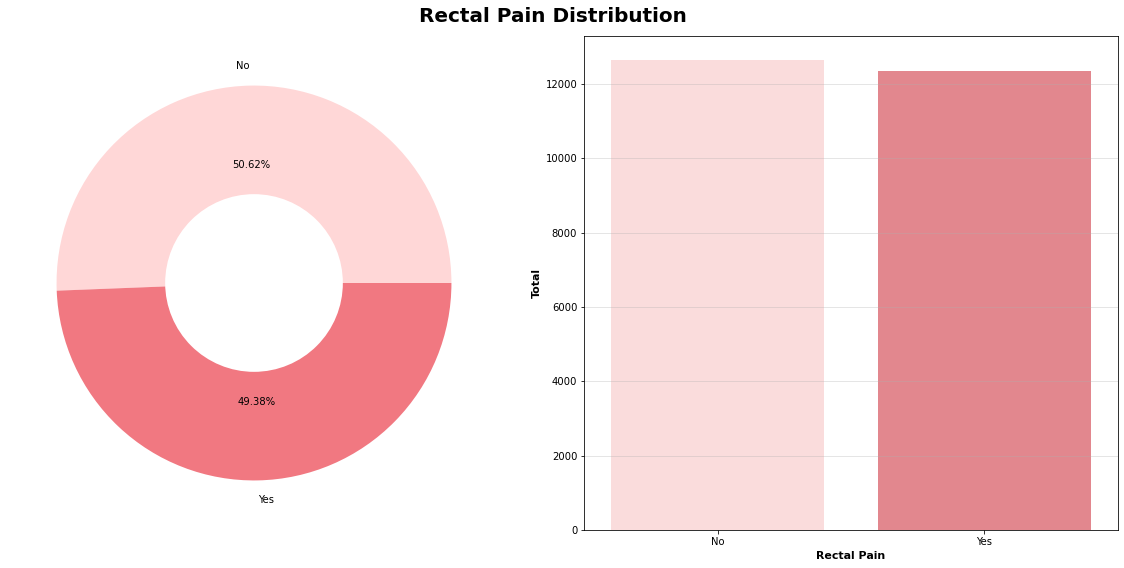

In [166]:
draw_boxplot_and_barchart(["No", "Yes"], "Rectal Pain", 
                          "Rectal Pain Distribution", "Rectal Pain", [0, 1])

> <Mark>The distribution of presence of rectal pain or not is almost the same.</Mark>

 ### Sore Throat Distribution

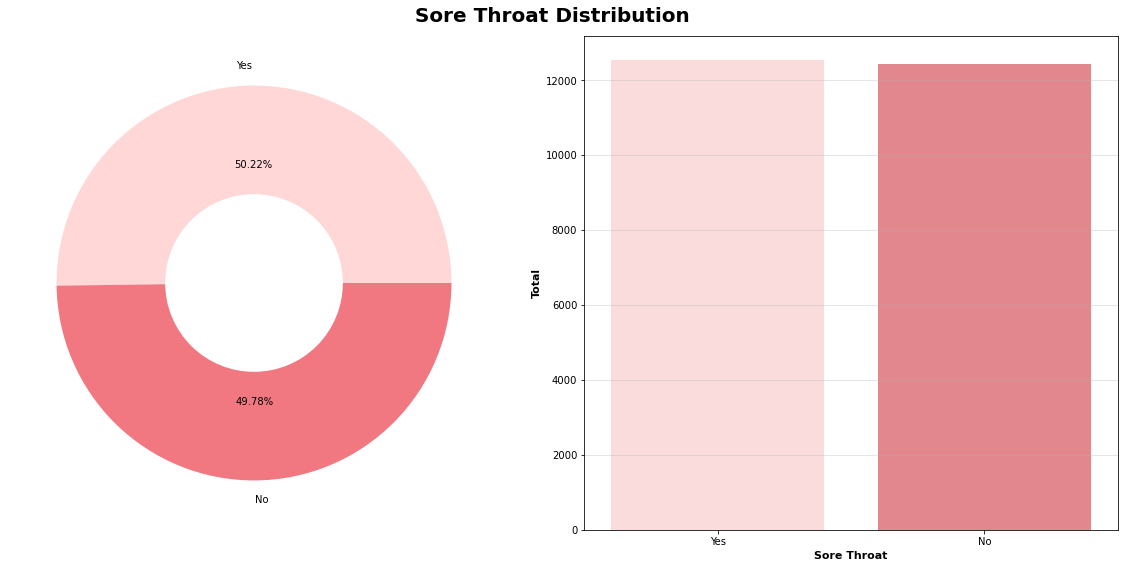

In [167]:
draw_boxplot_and_barchart(["Yes", "No"], "Sore Throat", 
                          "Sore Throat Distribution", "Sore Throat", [0, 1])

> <Mark>The distribution of presence of sore throat or not is almost the same.</Mark>

 ### Penile Oedema Distribution

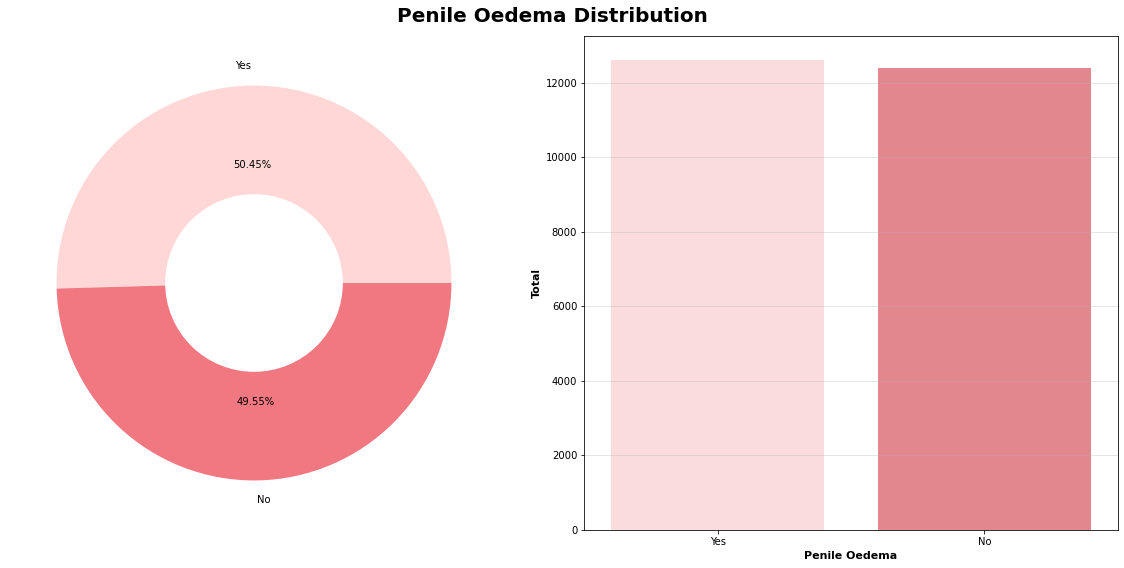

In [168]:
draw_boxplot_and_barchart(["Yes", "No"], "Penile Oedema", 
                          "Penile Oedema Distribution", "Penile Oedema", [0, 1])

> <Mark>The distribution of presence of penile oedema or not is almost the same.</Mark>

 ### Oral Lesions Distribution

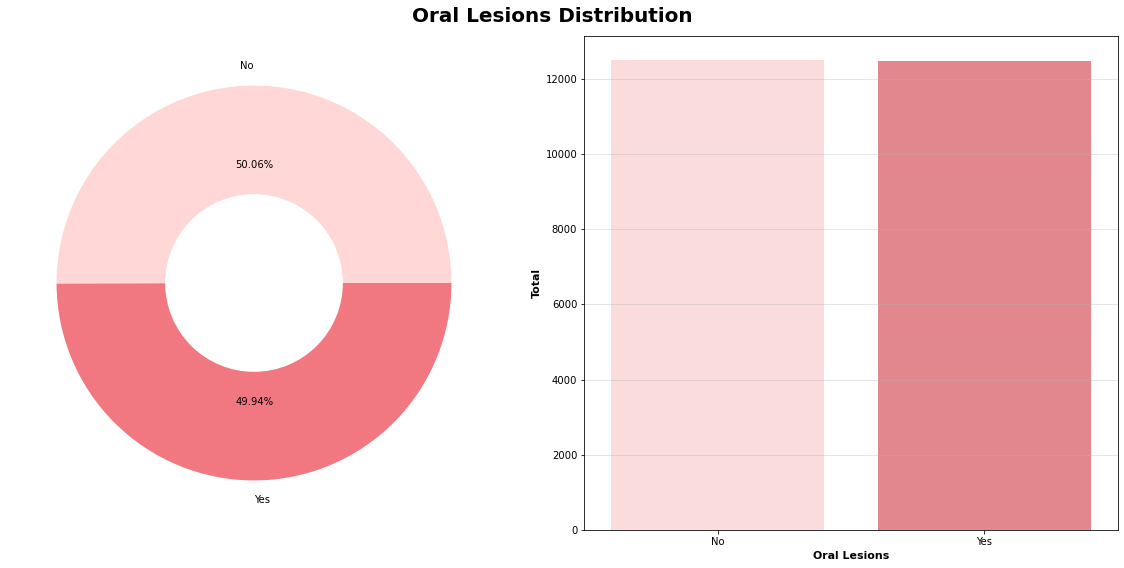

In [169]:
draw_boxplot_and_barchart(["No", "Yes"], "Oral Lesions", 
                          "Oral Lesions Distribution", "Oral Lesions", [0, 1])

> <Mark>The distribution of presence of Oral Lesions or not is almost the same.</Mark>

 ### Solitary Lesion Distribution

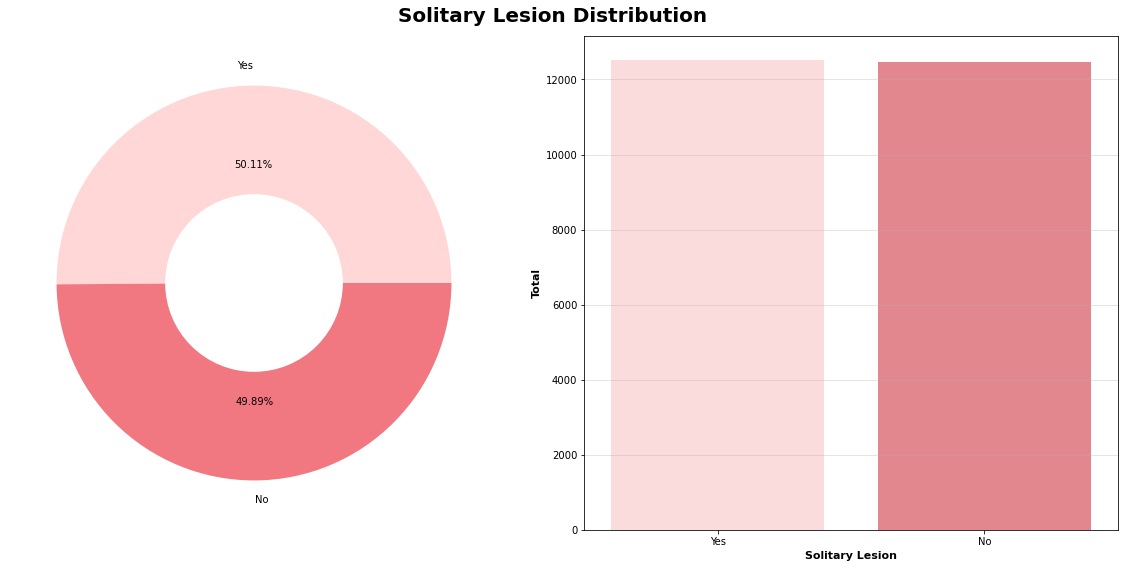

In [170]:
draw_boxplot_and_barchart(["Yes", "No"], "Solitary Lesion", 
                          "Solitary Lesion Distribution", "Solitary Lesion", [0, 1])

> <Mark>The distribution of presence of Solitary Lesion or not is almost the same.</Mark>

 ### Swollen Tonsils Distribution

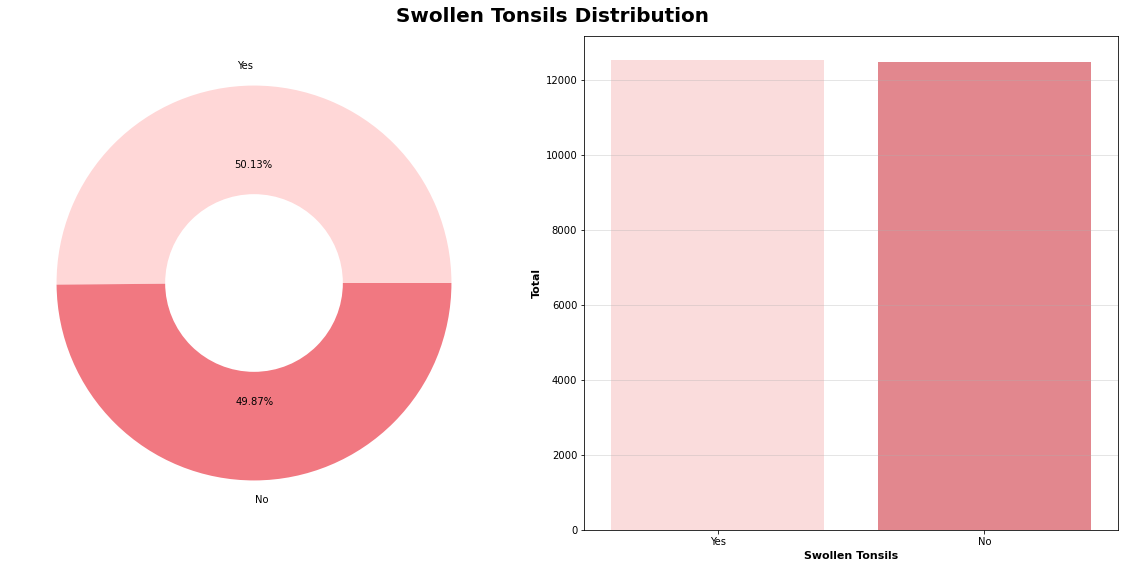

In [171]:
draw_boxplot_and_barchart(["Yes", "No"], "Swollen Tonsils", 
                          "Swollen Tonsils Distribution", "Swollen Tonsils", [0, 1])

> <Mark>The distribution of presence of Swollen Tonsils or not is almost the same.</Mark>

 ### HIV Infection Distribution

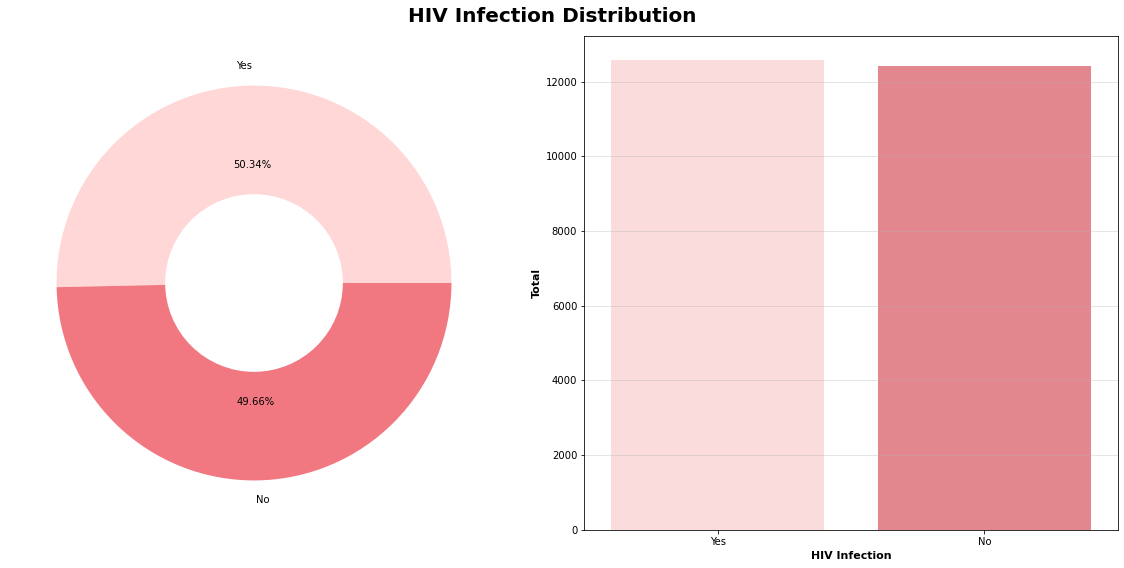

In [172]:
draw_boxplot_and_barchart(["Yes", "No"], "HIV Infection", 
                          "HIV Infection Distribution", "HIV Infection", [0, 1])

> <Mark>The distribution of presence of HIV Infection or not is almost the same.</Mark>

 ### Sexually Transmitted Infection Distribution

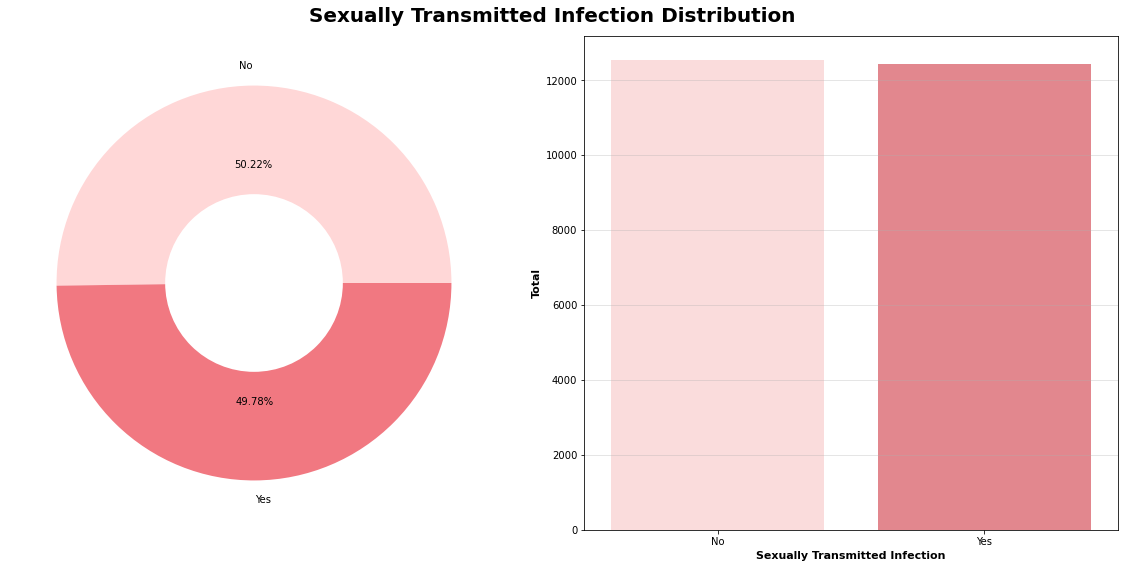

In [173]:
draw_boxplot_and_barchart(["No", "Yes"], "Sexually Transmitted Infection", 
                          "Sexually Transmitted Infection Distribution", 
                          "Sexually Transmitted Infection", [0, 1])

> <Mark>The distribution of presence of Sexually Transmitted Infection or not is almost the same.</Mark>

 ### Monkey Pox Distribution

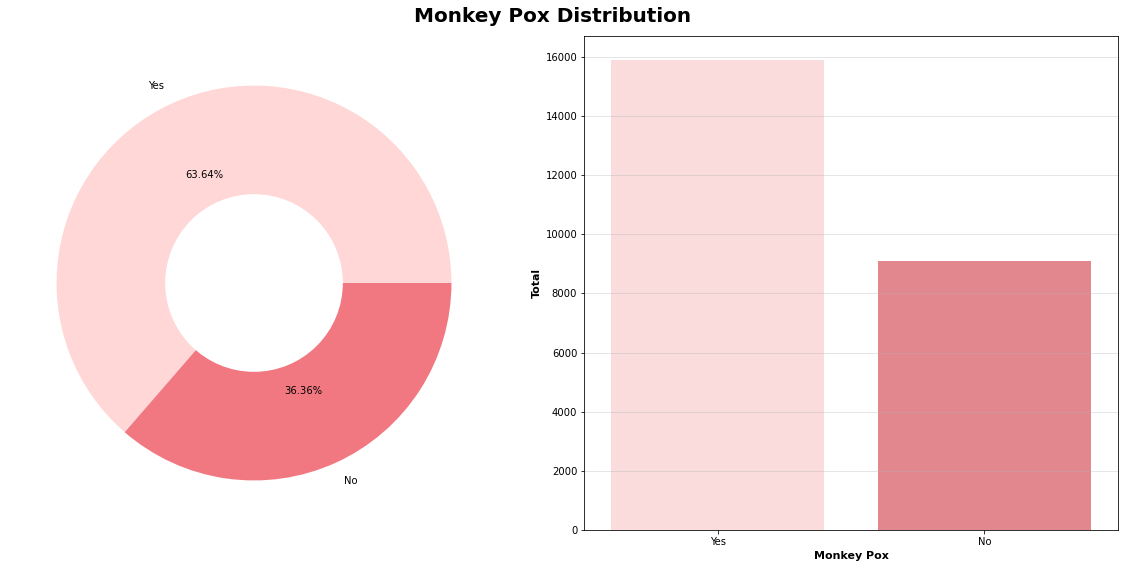

In [174]:
draw_boxplot_and_barchart(["Yes", "No"], "MonkeyPox", 
                          "Monkey Pox Distribution", 
                          "Monkey Pox", [0, 1])

> <Mark>The distribution of presence of Monkey Pox Infection is higher than not have the infection.</Mark>

<br>

# Analysis between the Target (MokeyPox) and other variables

### Draw Bar Plot Function

In [175]:
def draw_barplot(suptitle,x_axis, hue, xlable, xticks_index, xticks_labels, legend_title, legend_labels):
    print("\n")

    ## Size of the figure
    plt.figure(figsize=(16,8))

    ## Figure title
    plt.suptitle(suptitle, fontweight='heavy',fontsize='16', fontfamily='sans-serif')
    # plt.title( "", fontsize='8', fontfamily='sans-serif', loc='left')


    ## Count plot
    sns.countplot(data = df, x = x_axis, hue = hue, palette = color_mix[2:4])
    plt.xlabel(xlable, fontfamily='sans-serif', fontweight='bold')
    plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
    plt.xticks(xticks_index, xticks_labels)
    plt.legend(title = legend_title, labels= legend_labels, fontsize='15',title_fontsize='16', frameon=True)

    plt.show()

### Monkey pox Infection distribution based on Systemic Illness

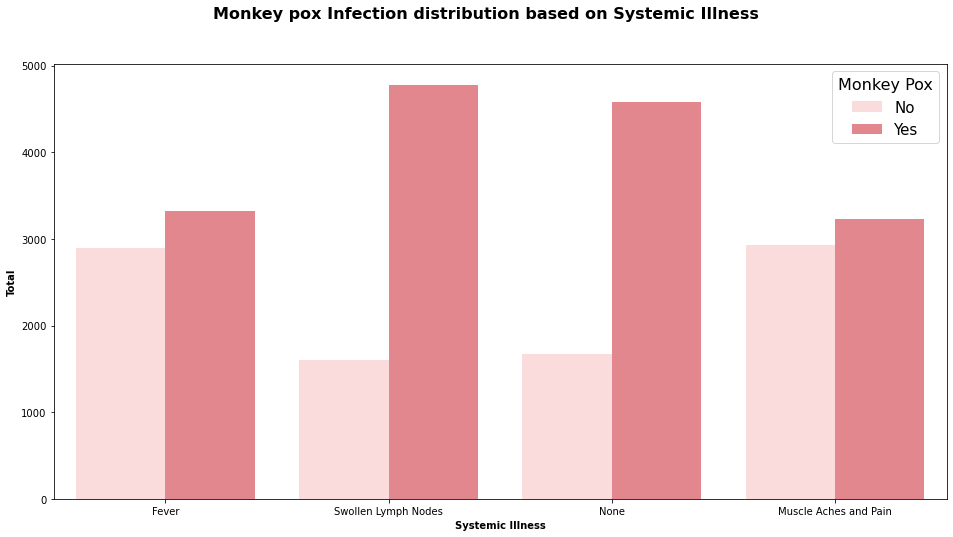

In [176]:
draw_barplot("Monkey pox Infection distribution based on Systemic Illness",
            "Systemic Illness", "MonkeyPox", "Systemic Illness", [0, 1, 2, 3],
            ["Fever", "Swollen Lymph Nodes", "None", "Muscle Aches and Pain"],
            "Monkey Pox", ["No", "Yes"])

<h3><mark>Observation</h3><br>
1- The distribution is <mark>almost the same</mark> between Monkey pox patients and pepole don't have the infection in Fever & Muscle aches and pain.
    
2- The distribution is <mark>higher</mark> in positive Monkey pox patients in swollen lymph nodes and people who don't have systemic illness.

### Monkey pox Infection distribution based on Rectal Pain

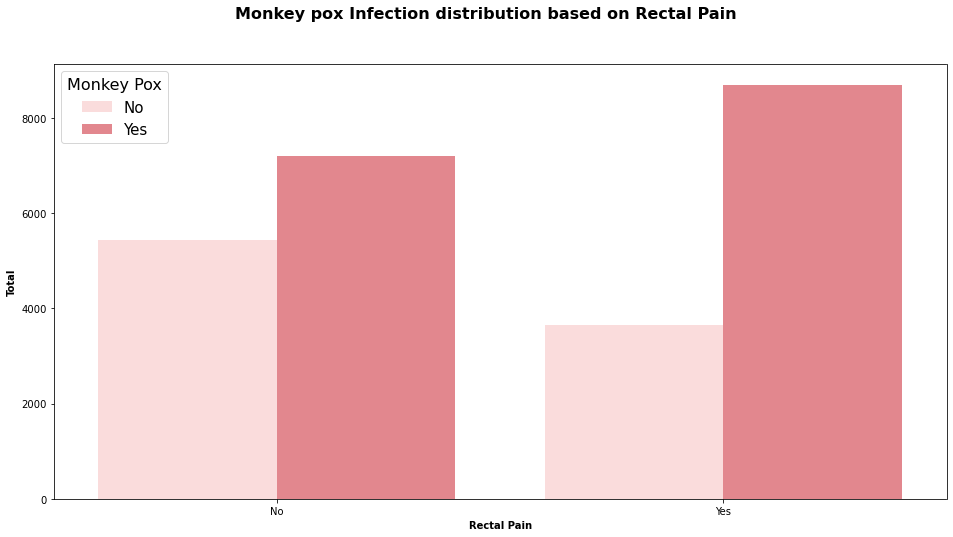

In [177]:
draw_barplot("Monkey pox Infection distribution based on Rectal Pain",
            "Rectal Pain", "MonkeyPox", "Rectal Pain", [0, 1],
            ["No", "Yes"],
            "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is higher in pepole who have rectal pain

### Monkey pox Infection distribution based on Sore Throat

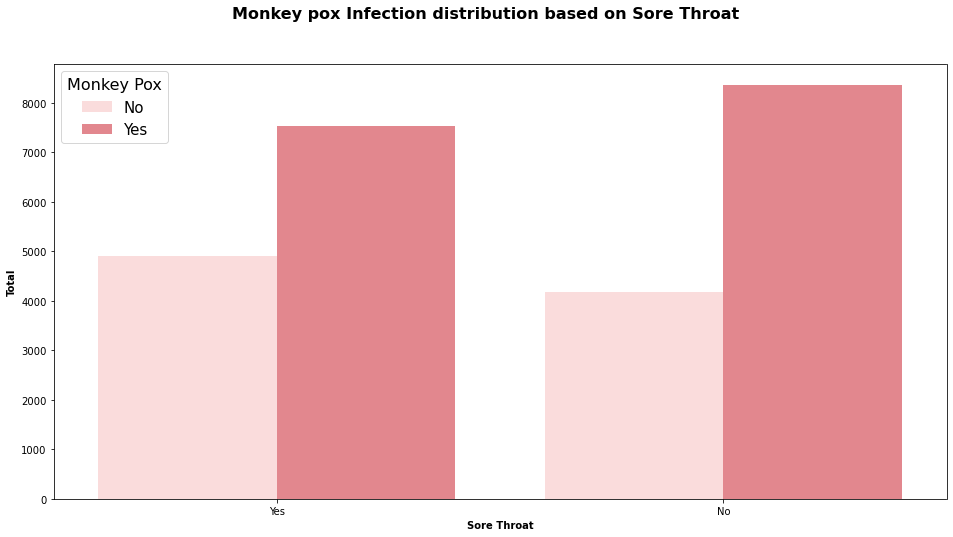

In [178]:
draw_barplot("Monkey pox Infection distribution based on Sore Throat",
            "Sore Throat", "MonkeyPox", "Sore Throat", [0, 1], ["Yes", "No"],
            "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is almost higher in pepole who don't have sore throat   

### Monkey pox Infection distribution based on Penile Oedema

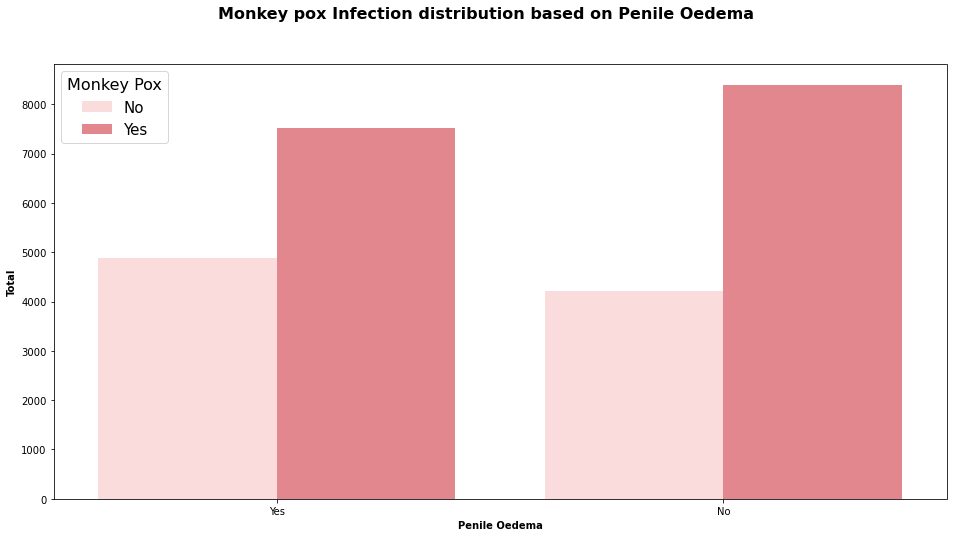

In [179]:
draw_barplot("Monkey pox Infection distribution based on Penile Oedema",
            "Penile Oedema", "MonkeyPox", "Penile Oedema", [0, 1], ["Yes", "No"],
            "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is almost higher in pepole who don't have penile oedema   

### Monkey pox Infection distribution based on Oral Lesions

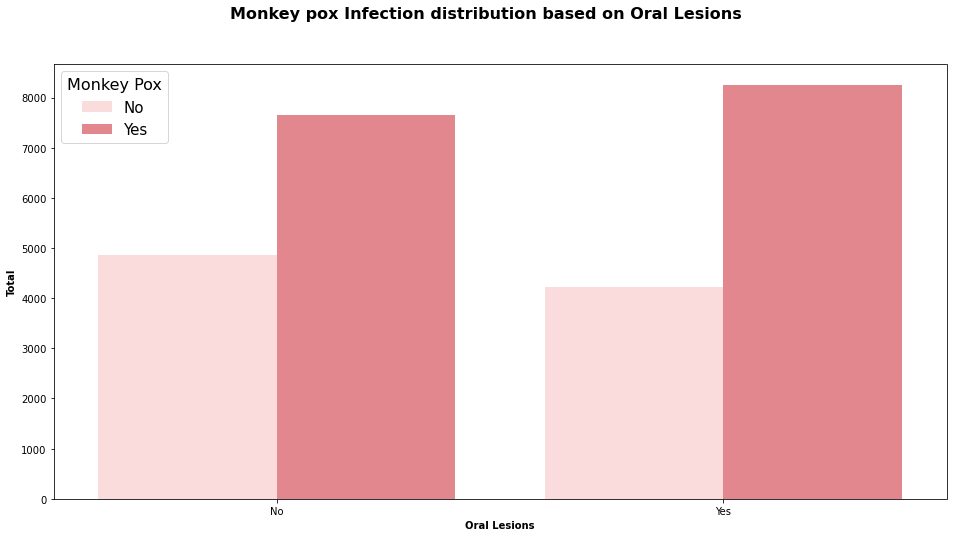

In [180]:
draw_barplot("Monkey pox Infection distribution based on Oral Lesions",
            "Oral Lesions", "MonkeyPox", "Oral Lesions", [0, 1], ["No", "Yes"],
            "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is almost higher in pepole who have oral lesions 

### Monkey pox Infection distribution based on Solitary Lesion

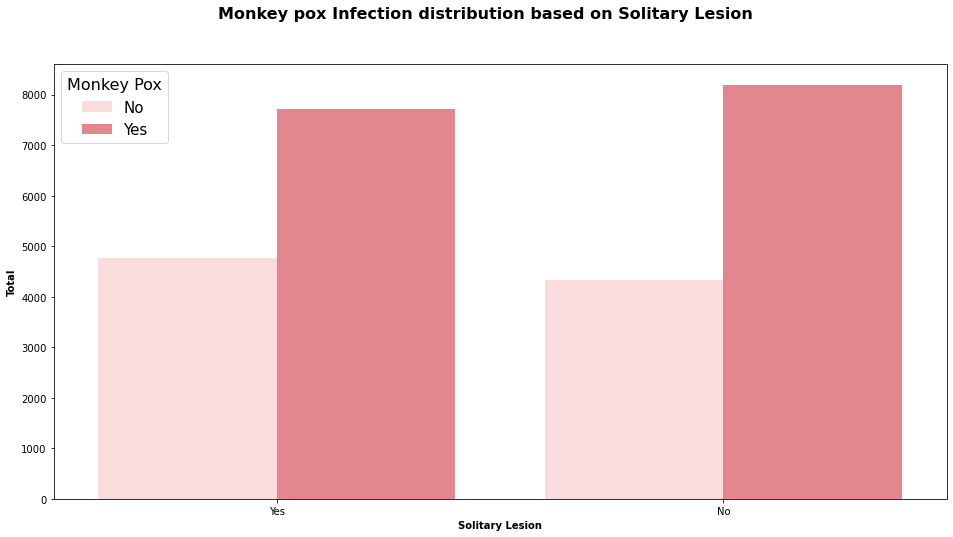

In [181]:
draw_barplot("Monkey pox Infection distribution based on Solitary Lesion",
            "Solitary Lesion", "MonkeyPox", "Solitary Lesion", 
             [0, 1], ["Yes", "No"], "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is almost higher in pepole who don't have Solitary Lesion

### Monkey pox Infection distribution based on Swollen Tonsils

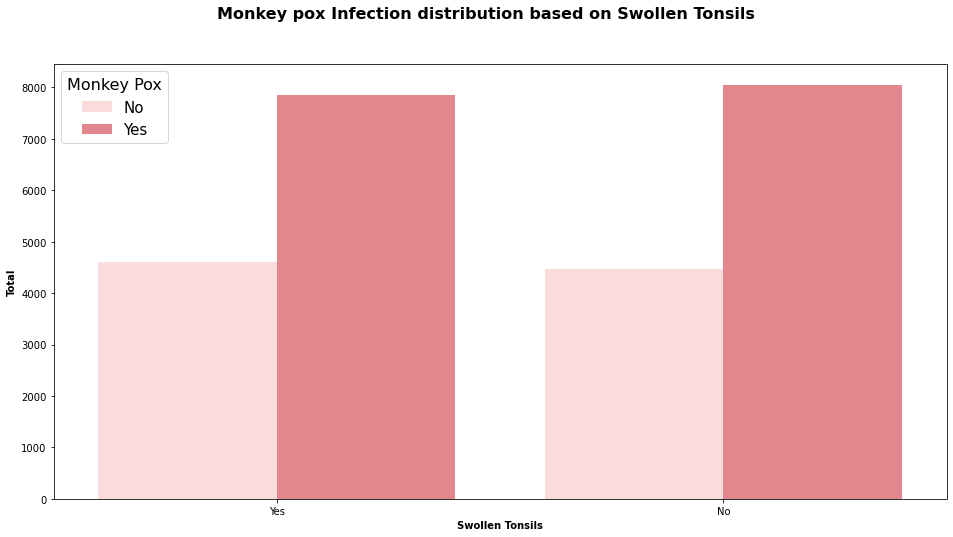

In [182]:
draw_barplot("Monkey pox Infection distribution based on Swollen Tonsils",
            "Swollen Tonsils", "MonkeyPox", "Swollen Tonsils", 
             [0, 1], ["Yes", "No"], "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is almost the same between pepole who don't have swellen tonsils and people who have it 

### Monkey pox Infection distribution based on HIV Infection

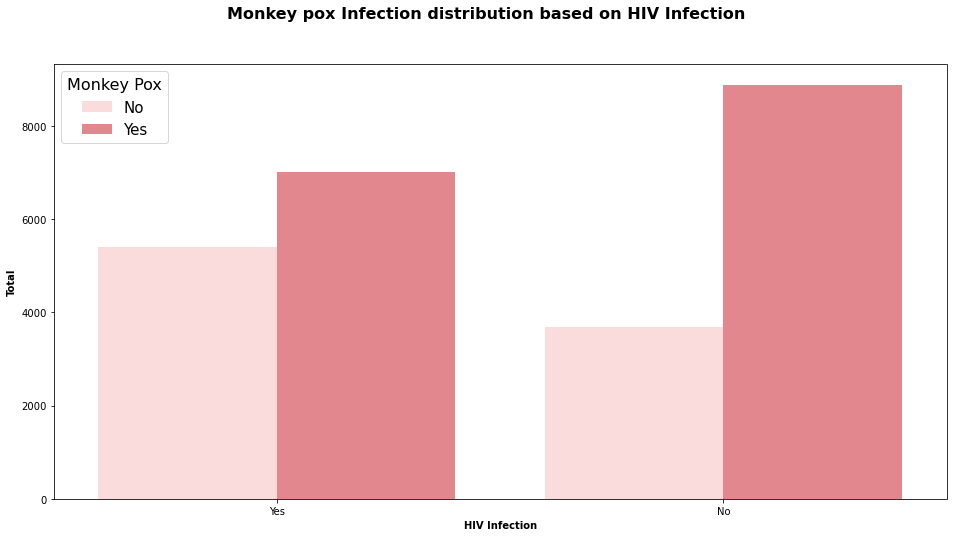

In [183]:
draw_barplot("Monkey pox Infection distribution based on HIV Infection",
            "HIV Infection", "MonkeyPox", "HIV Infection", 
             [0, 1], ["Yes", "No"], "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is higher in pepole who don't have  HIV infection 

### Monkey pox Infection distribution based on Sexually Transmitted Infection

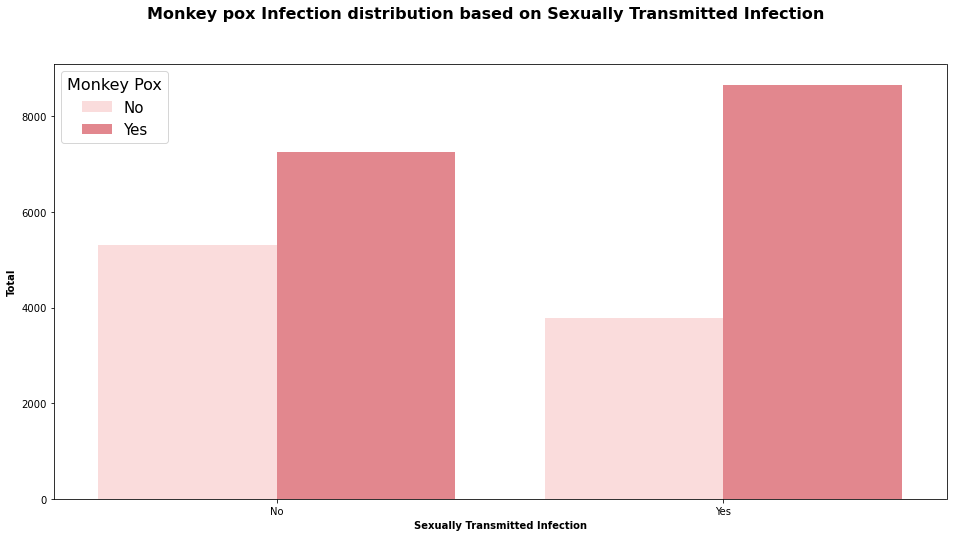

In [184]:
draw_barplot("Monkey pox Infection distribution based on Sexually Transmitted Infection",
            "Sexually Transmitted Infection", "MonkeyPox", "Sexually Transmitted Infection", 
             [0, 1], ["No", "Yes"], "Monkey Pox", ["No", "Yes"])

<h1><mark>Observation</h1><br>
The distribution of positive Monkey Pox infection is higher in pepole who have  sexually transmitted infection

<br>

# Correlation between variables

In [185]:
## Correlation
corr = df.corr()
corr

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Rectal Pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666,0.140727
Sore Throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901,0.063385
Penile Oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722,0.061905
Oral Lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725,0.051955
Solitary Lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849,0.037471
Swollen Tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469,0.013221
HIV Infection,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309,0.146192
Sexually Transmitted Infection,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000,0.123376
MonkeyPox,0.140727,0.063385,0.061905,0.051955,0.037471,0.013221,0.146192,0.123376,1.000000


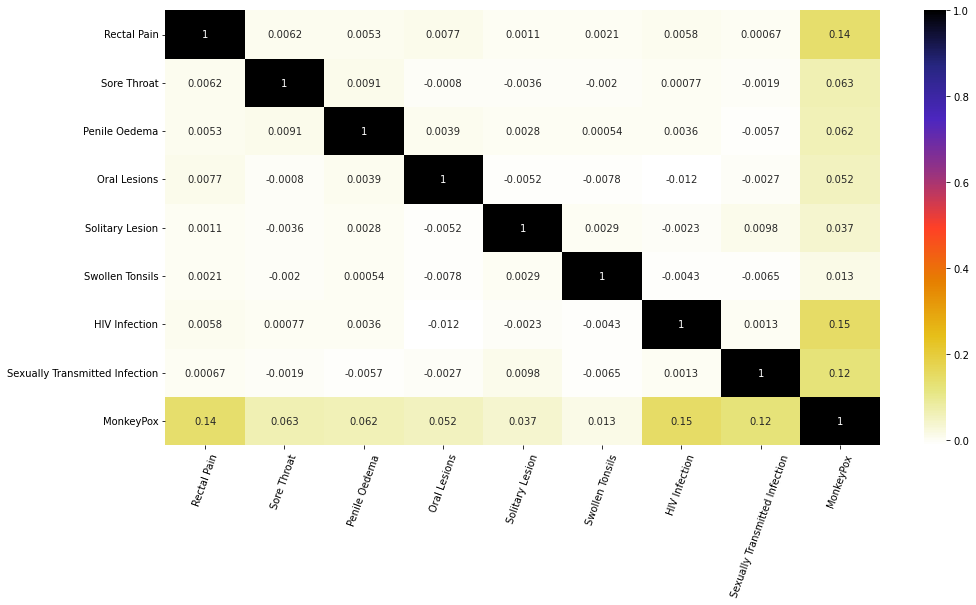

In [186]:
## Figure size
plt.figure(figsize = (16,8))

## Heatmap
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.xticks(rotation = 70)
plt.show()

# Machine learning

### Convert bool to int

In [187]:
cols = ['Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection']

for col in cols:
    df[col] = df[col].astype(int)

df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,0,1,1,1,0,1,0,0,0
1,Fever,1,0,1,1,0,0,1,0,1
2,Fever,0,1,1,0,0,0,1,0,1
3,None,1,0,0,0,1,1,1,0,1
4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1


### Label encoding For Systemic Illness column 

In [188]:
from sklearn.preprocessing import LabelEncoder

le_systemic_illness = LabelEncoder()

df["Systemic Illness"] = le_systemic_illness.fit_transform(df["Systemic Illness"])

df["Systemic Illness"].unique()

array([2, 0, 3, 1])

### Features Separating

In [189]:
X = df.drop(["MonkeyPox"], axis = "columns")
y = df["MonkeyPox"]

### Data split

In [190]:
from sklearn.model_selection import train_test_split

# Splitting Dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Classification model 
<mark>I want to predict whether the case has monkey pox infection or not.</mark><br>

In [191]:
from sklearn.metrics import f1_score, confusion_matrix

def scores(actual, predicted):
    c_matrix = confusion_matrix(actual, predicted)
    print(c_matrix)
    score = f1_score(actual, predicted)
    print("F1 score: ", score)

In [192]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_leaf = 50, max_features = 3, bootstrap = True)
rfc.fit(X_train, y_train,)
y_pred = rfc.predict(X_test)
scores(y_test, y_pred)

[[ 863 1875]
 [ 447 4315]]
F1 score:  0.7879839298758218


#### <mark> F1 score interpretation </mark>
The model’s ability to both capture positive cases and be accurate with the cases it does capture is **0.78**, which is seen as an OK value.

### Pickle file

In [193]:
import pickle

data = {"model": rfc, "le_systemic_illness": le_systemic_illness}
with open ("trained_model.pkl", "wb") as file:
    pickle.dump(data, file)